# In this project we will predict prices of houses in Bengaluru. 


## Importing useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Housing Datasheet

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.shape

(13320, 9)

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Since price of the house does not depend on the name of society we can actually drop that feature from our data.

In [4]:
data_new = data.drop(labels='society' , axis=1)
data_new

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


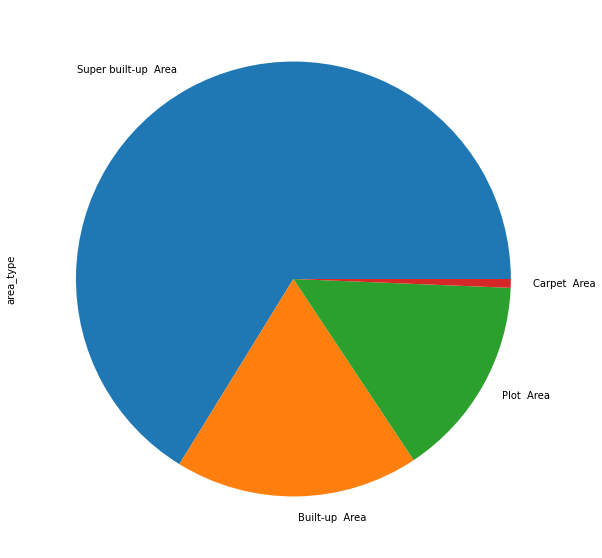

In [83]:
plt.figure(figsize=(10,10))
data_new.area_type.value_counts().plot(kind='pie')

In [6]:
data_new.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [7]:
data_new.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [8]:
data_new.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

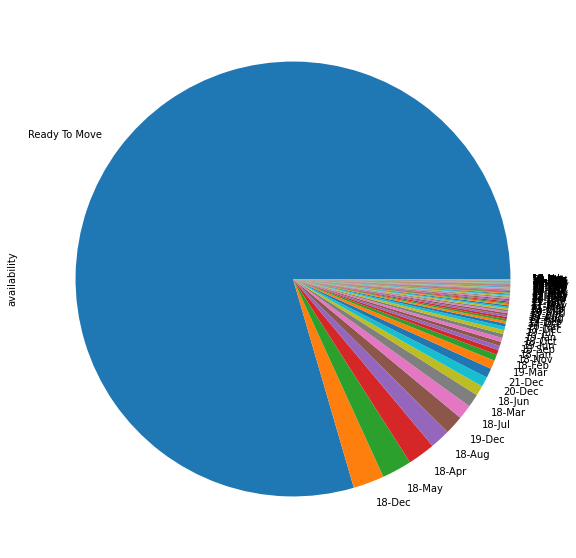

In [84]:
plt.figure(figsize=(10,10))
data_new.availability.value_counts().plot.pie()

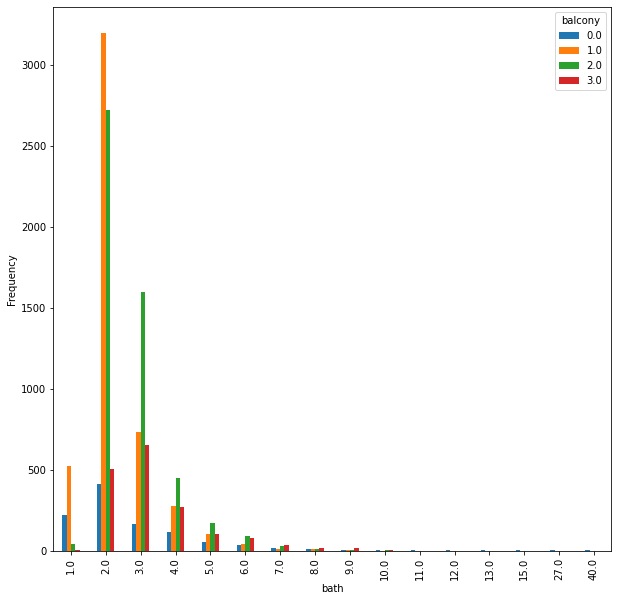

In [10]:
pd.crosstab(data_new.bath , data_new.balcony).plot.bar(figsize=(10,10) , ylabel='Frequency')

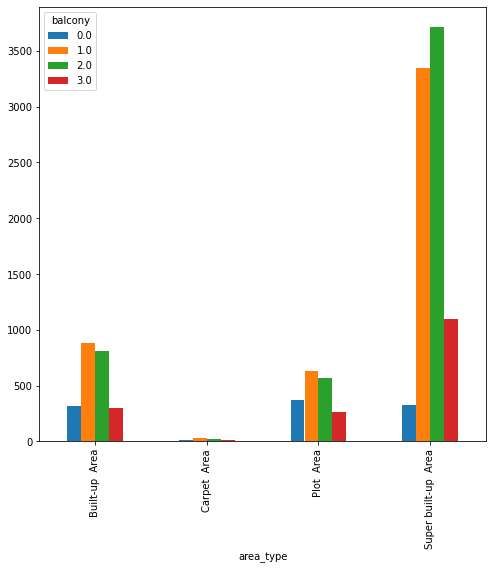

In [11]:
pd.crosstab(data_new.area_type , data_new.balcony).plot.bar(figsize=(8,8))

## Since we have missing values in some of our features, we have to resolve them.

In [12]:
data_new.bath = data_new.bath.fillna(data.bath.median())
data_new.balcony = data_new.balcony.fillna(data.balcony.median())

In [13]:
data_new.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

### Since remaining missing data points are very small as compared to the total datapoints so we can actually remove those rows,
### it will not cause an effective difference in the data.

In [14]:
data_new = data_new.dropna()
data_new.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
# Converting the size column to bhk
# data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
# data = data.drop('size', axis='columns')
# data.groupby('bhk')['bhk'].agg('count')

In [16]:
data_new.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:

# here we have range values so we will filter them out
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
data_new[~data_new['total_sqft'].apply(isFloat)]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,2.0,2.0,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135


In [19]:
def convert_sqft_to_num(x):
  val = x.split('-')
  if len(val)==2:
    return (float(val[0])+float(val[1]))/2
  try:
    return float(x)
  except:
    return None

In [20]:
data_new['new_total_sqft'] = data_new.total_sqft.apply(convert_sqft_to_num)
data_new = data_new.drop('total_sqft' , axis='columns')
data_new.head()

,area_type,availability,location,size,bath,balcony,price,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,51.00,1200.0


In [21]:
#  Since we have returned with certain none values we will try to remove them
data_new.new_total_sqft.isna().sum()

46

In [22]:
# we have 46 none values 
data_new = data_new.dropna()

In [23]:
# again checking for none values
data_new.new_total_sqft.isna().sum()

0

In [24]:
# we will once agin check for any null values in our modified data
data_new.isna().sum()

area_type         0
availability      0
location          0
size              0
bath              0
balcony           0
price             0
new_total_sqft    0
dtype: int64

### Feature Engineering

While comparing the prices we must have a comparable price and for that we will use price per sqft instead of price.

In [25]:
# Adding a new column price_per_sqft

data_new1 = data_new.copy()
data_new1['price_per_sqft'] = data_new1['price']*100000/data_new1['new_total_sqft']
data_new1.head()

# here we have multiplied 100000 because the price given is in lakhs.

,area_type,availability,location,size,bath,balcony,price,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,39.07,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5.0,3.0,120.00,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,62.00,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,95.00,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,51.00,1200.0,4250.000000


In [26]:
len(data_new1.location.unique())

1298

In [27]:
data_new1.location = data_new1.location.apply(lambda x: x.strip())
lvc = data_new1.location.value_counts()
lvc

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [28]:
data_new1.location = data_new1.location.apply(lambda x: x.strip())
len(lvc[lvc<=10]), len(data_new1.location.unique())

(1047, 1287)

In [29]:
# labelling the locations with less then or equal to 10 occurences to 'other'
locations_less_than_10 = lvc[lvc<=10]

data_new1.location = data_new1.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(data_new1.location.unique())

241

In [30]:
# checking the unique values in 'availability column'
# data_new1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
avc = data_new1.availability.value_counts()
avc

Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [31]:
# labelling the dates into not ready
dates = data_new1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
data_new1.availability = data_new1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(data_new1.availability.unique())

2

In [32]:
# Checking the unique values in 'area_type' column
data_new1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

# Since the column has only few unique values, we don't perform any operation

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

In [33]:
# Converting the size column to bhk
data_new1['bhk'] = data_new1['size'].apply(lambda x: int(x.split(' ')[0]))
data_new1 = data_new1.drop('size', axis='columns')
data_new1.groupby('bhk')['bhk'].agg('count')

bhk
1      647
2     5518
3     4842
4     1412
5      352
6      220
7      100
8       88
9       52
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

## Removing outliers

In [34]:
data_new2 = data_new1[~(data_new1.new_total_sqft/data_new1.bhk<300)]
len(data_new2) , len(data_new1)

(12513, 13257)

In [35]:
data_new2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we can see that price_per_sqft has a very wide range ranging from 267.8298 to 176470.588.
So we will try to remove such extreme points.

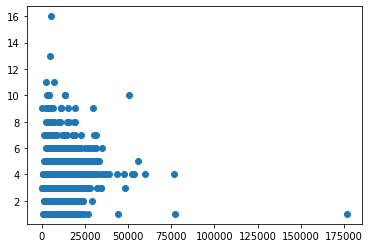

In [36]:
plt.scatter(data_new2.price_per_sqft , data_new2.bhk)
plt.show()

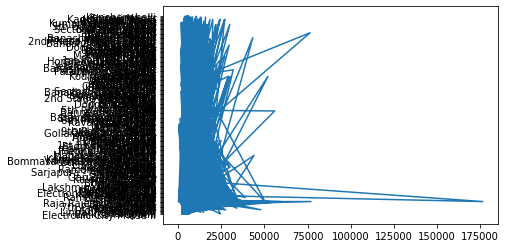

In [37]:
plt.plot(data_new2.price_per_sqft , data_new2.location)
plt.show()

In [38]:
def remove_pps_outliers(data_new2):
  data_out = pd.DataFrame()

  for key, sub_data in data_new2.groupby('location'):
    mean = np.mean(sub_data.price_per_sqft)
    std_dev = np.std(sub_data.price_per_sqft)
    reduce_data = sub_data[(sub_data.price_per_sqft>(mean-std_dev)) & (sub_data.price_per_sqft<(mean+std_dev))]
    data_out = pd.concat([data_out, reduce_data], ignore_index=True)
  return data_out

data_new3 = remove_pps_outliers(data_new2)
len(data_new2) , len(data_new3)

(12513, 10288)

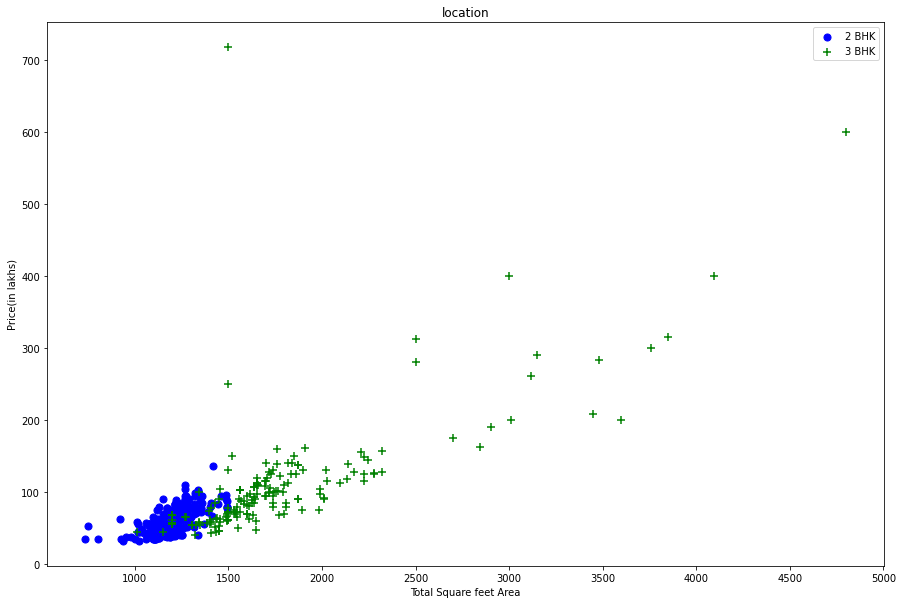

In [39]:
def plot_scatter_chart(data , location):
  bhk2 = data_new1[(data_new1.location== location) & (data_new1.bhk == 2)]
  bhk3 = data_new1[(data_new1.location== location) & (data_new1.bhk == 3)]
  plt.figure(figsize=(15,10))
  plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
  plt.xlabel('Total Square feet Area')
  plt.ylabel('Price(in lakhs)')
  plt.title('location')
  plt.legend()
  # print(bhk2)
  # print(bhk3)

plot_scatter_chart(data_new3 , 'Whitefield')

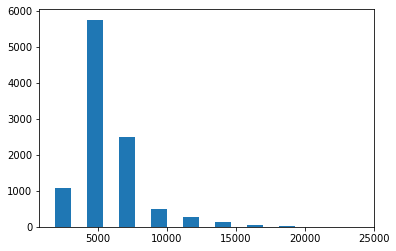

In [40]:
plt.hist(data_new3.price_per_sqft , rwidth=0.5)
plt.show()

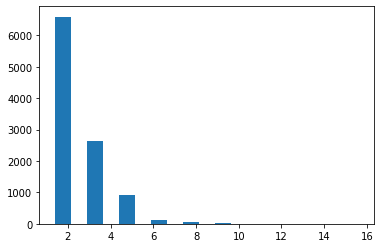

In [41]:
plt.hist(data_new3.bath, rwidth=0.5)
plt.show()

## Model Building

In [42]:
# removing the columns that were added just for preparation of our data
data_new4 = data_new3.drop('price_per_sqft', axis='columns') 

In [43]:
data_new4

,area_type,availability,location,bath,balcony,price,new_total_sqft,bhk
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.00,2850.0,4
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.00,1630.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.00,1875.0,3
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.00,1200.0,3
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.00,1235.0,2
...,...,...,...,...,...,...,...,...
10283,Super built-up Area,Ready To Move,other,2.0,2.0,110.00,1353.0,2
10284,Plot Area,Not Ready,other,1.0,0.0,26.00,812.0,1
10285,Super built-up Area,Not Ready,other,2.0,2.0,63.93,1440.0,3
10286,Super built-up Area,Ready To Move,other,2.0,2.0,48.00,1075.0,2


In [44]:
dummy_cols = pd.get_dummies(data_new4.location).drop('other', axis='columns')
data_new4 = pd.concat([data_new4,dummy_cols], axis='columns')

In [45]:
dummy_cols = pd.get_dummies(data_new4.availability).drop('Not Ready', axis='columns')
data_new4 = pd.concat([data_new4,dummy_cols], axis='columns')

In [46]:
dummy_cols = pd.get_dummies(data_new4.area_type).drop('Super built-up  Area', axis='columns')
data_new4 = pd.concat([data_new4,dummy_cols], axis='columns')

In [47]:
data_new5 = data_new4.drop(['area_type','availability','location'], axis='columns')
data_new5.head()

,bath,balcony,price,new_total_sqft,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,4.0,1.0,428.0,2850.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,1630.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.0,1875.0,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,0.0,130.0,1200.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2.0,148.0,1235.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Splitting the dataset into features and label
X = data_new5.drop('price', axis='columns')
y = data_new5['price']

In [49]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(X,y)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred_1 = lin_reg.predict(x_test)

In [53]:
r2_score(y_test,y_pred_1)

-4.1433517736429235e+17

In [54]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred_2 = dtr.predict(x_test)

In [56]:
r2_score(y_test,y_pred_2)

0.4370541836340722

In [57]:
def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        # 'lasso': {
        #     'model': Lasso(),
        #     'parameters': {
        #         'alpha': [1,2],
        #         'selection': ['random', 'cyclic']
        #     }
        # },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

,model,best_parameters,accuracy
0,linear_regression,{'normalize': True},0.812092
1,decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.688293


# **We are getting a good accuracy value for linear regression whereas Decision tree model's accuracy value falls short of Linear Regression.**

In [74]:
pd.DataFrame({'Coefficients':lin_reg.coef_})

,Coefficients
0,7.677751
1,0.546491
2,0.076188
3,-8.024525
4,226.712585
...,...
243,3.852928
244,0.155243
245,-5.320190
246,10.388903


In [80]:
lin_reg.intercept_

-17.919199950636823